In [53]:
import pandas as pd
import numpy as np
from numpy.random import seed

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
seed(23)

In [55]:
df = pd.read_csv("./DATA/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [56]:
cols = np.transpose(df.columns.tolist())
cols

array(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28', 'Amount', 'Class'], dtype='<U6')

In [57]:
df.shape

(284807, 31)

In [58]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [59]:
y = df['Class'].values

In [60]:
X = df[cols[0:-1]].values
X.shape

(284807, 30)

In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split  
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve, confusion_matrix

In [62]:
scaler = StandardScaler()

In [63]:
X = scaler.fit(X).transform(X)

In [64]:
X.std(), X.mean()

(1.0000000000000007, -1.1043744864527125e-17)

In [65]:
X_tr, X_t, y_tr, y_t = train_test_split(X, y, test_size=0.2, random_state=100)
X_tr.shape, X_t.shape

((227845, 30), (56962, 30))

## Support Vector Machine  

In [66]:
from sklearn.svm import SVC

clf_SVC = SVC()
clf_SVC.fit(X_tr, y_tr)
y_p = clf_SVC.predict(X_t)

In [67]:
print("ROC :", roc_auc_score(y_t, y_p), "\t", "Accuracy :", accuracy_score(y_t, y_p))

ROC : 0.7968310369992614 	 Accuracy : 0.9992275552122467


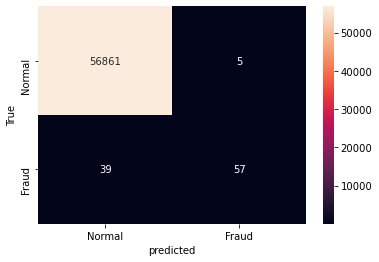

In [68]:
conf_m = confusion_matrix(y_t, y_p)
labels = ['Normal', 'Fraud'] 

sns.heatmap(conf_m, xticklabels=labels, yticklabels=labels,
           annot=True, fmt="d")
plt.xlabel("predicted")
plt.ylabel("True")
plt.show()

## ScikitLearn based on Bayes Theorem 

In [69]:
from sklearn.naive_bayes import GaussianNB

In [70]:
clf_GNB = GaussianNB()

In [71]:
clf_GNB.fit(X_tr, y_tr)

GaussianNB()

In [72]:
y_p = clf_GNB.predict(X_t)

In [73]:
print("ROC : ", roc_auc_score(y_t, y_p), "Accuracy : ", accuracy_score(y_t, y_p))

ROC :  0.8897607606771476 Accuracy :  0.9771426565078474


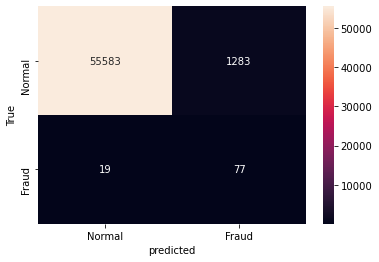

In [74]:
conf_m = confusion_matrix(y_t, y_p)
labels = ['Normal', 'Fraud'] 

sns.heatmap(conf_m, xticklabels=labels, yticklabels=labels,
           annot=True, fmt="d")
plt.xlabel("predicted")
plt.ylabel("True")
plt.show()

## ScikitLearn ensemble type 

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
clf_RF = RandomForestClassifier(max_features='log2')

In [77]:
clf_RF.fit(X_tr, y_tr)

RandomForestClassifier(max_features='log2')

In [78]:
y_p = clf_RF.predict(X_t)
print("ROC :", roc_auc_score(y_t, y_p), '\t', "Accuracy :", accuracy_score(y_t, y_p))

ROC : 0.8540875332653374 	 Accuracy : 0.9993504441557529


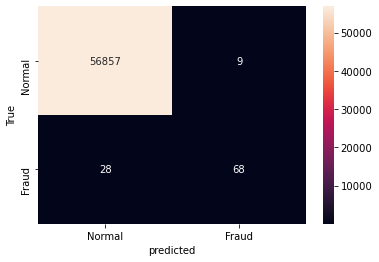

In [79]:
conf_m = confusion_matrix(y_t, y_p)
labels = ['Normal', 'Fraud'] 

sns.heatmap(conf_m, xticklabels=labels, yticklabels=labels,
           annot=True, fmt="d")
plt.xlabel("predicted")
plt.ylabel("True")
plt.show()

## ScikitLearn Regression Type

In [80]:
from sklearn.linear_model import LogisticRegression

In [81]:
classifier_lr = LogisticRegression(max_iter = 150)

In [82]:
print('ROC :', roc_auc_score(y_t, y_p), '\t', 'Accuracy :', accuracy_score(y_t, y_p))

ROC : 0.8540875332653374 	 Accuracy : 0.9993504441557529


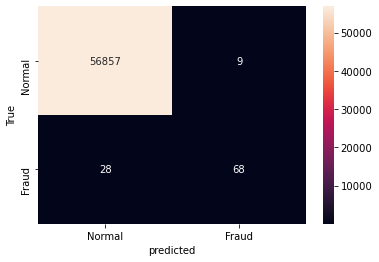

In [83]:
conf_m = confusion_matrix(y_t, y_p)
labels = ['Normal', 'Fraud'] 

sns.heatmap(conf_m, xticklabels=labels, yticklabels=labels,
           annot=True, fmt="d")
plt.xlabel("predicted")
plt.ylabel("True")
plt.show()

## looks like GaussianNB !!